In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [23]:
def indicator(point,x):
    n   =   len(x)
    result  =   np.zeros(n)
    
    for i in range(n):
        if  point   <=  x[i]:
            result[i]   =   1
    return (result)

def emp_est_cdf(data,x):

    n   =  len(data)
    result  =   0
    for i in range(n):
        result = result+1/n*indicator(data[i],x)
    return result

def pre_conf_int(x,prec,data):
    #print(data)
    #print(x)
    l   =   len(x)
    n   =   len(data)
    res_l   =   np.zeros(l)
    res_n   =   np.zeros(l)
    
    conf    =   np.sqrt(np.log(2/prec)/(2*n))
    #print(conf)
    
    basis   =   emp_est_cdf(data,x)
    for i in range(l):
        print(basis-conf)
        res_l[i]    =   max(basis[i]-conf,0)
        res_n[i]    =   min(basis[i]+conf,1)
    return (res_l,res_n)
    

In [24]:
x = np.linspace(-5,5,10000) # x-axis for plots
y = 0.5*(1+special.erf(x/np.sqrt(2))) # true CDF of the Gaussian
n = 1000 #number of data points
data = np.random.normal(0,1,n) # datapoints

In [25]:
y_emp = emp_est_cdf(data,x)
(low,up) = pre_conf_int(x,0.05,data)

[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306  0.95705306
  0.95705306]
[-0.04294694 -0.04294694 -0.04294694 ...  0.95705306

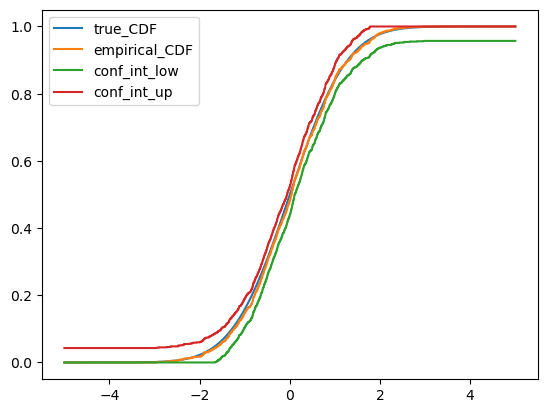

In [26]:
plt.plot(x,y,label = 'true_CDF')
plt.plot(x,y_emp, label = 'empirical_CDF')
plt.plot(x,low, label='conf_int_low')
plt.plot(x,up,label='conf_int_up')
plt.legend()